# Set up

In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("../")  # append parent dir to sys.path

In [3]:
import pandas as pd
import joblib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from yellowbrick.regressor import ResidualsPlot, residuals_plot

/home/gaspard-louis.charles/Documents/git/wind-power/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
import wind_constants as cst

In [5]:
# plt.rcParams.update(params)
# sns.set_style("white")

In [6]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, LarsCV
from sklearn.ensemble import (
    RandomForestRegressor,
    AdaBoostRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor,
)
from sklearn.model_selection import train_test_split

In [7]:
data = joblib.load("../data/processed/processed_uncleaned.joblib")

In [13]:
plt.rcParams.update(
    {
        "figure.figsize": (30, 15),
    }
)

# Residuals Analysis

In [8]:
data = data[cst.FEATURES + [cst.TARGET]].dropna()

In [9]:
X, y = data[cst.FEATURES], data[cst.TARGET]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

## RF

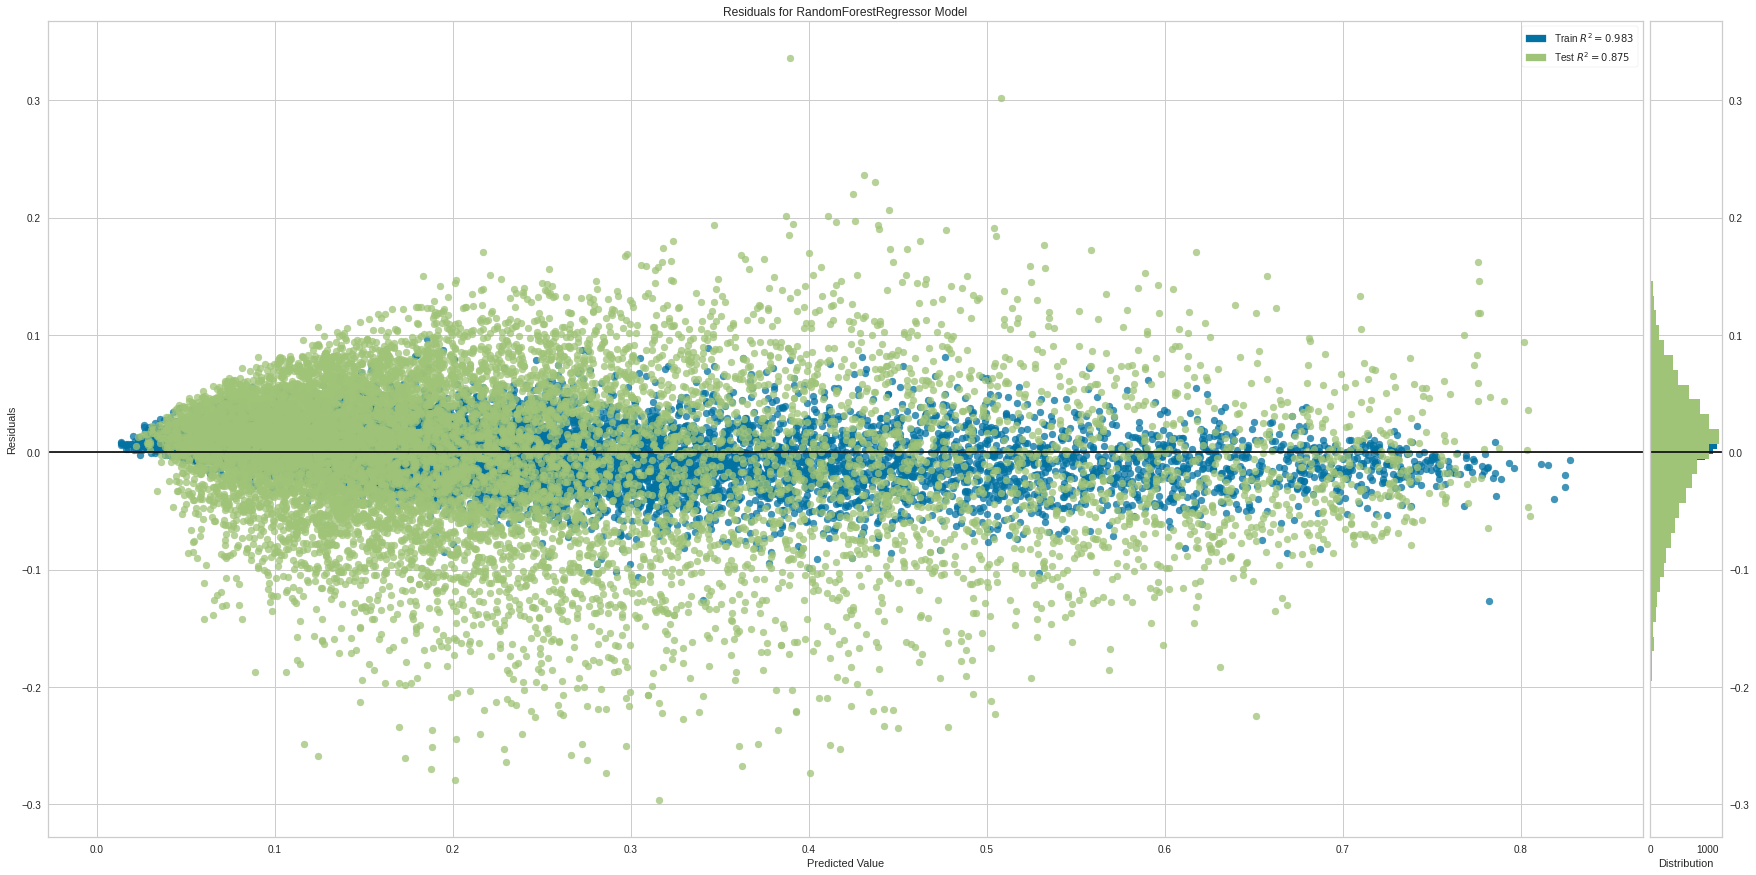

In [14]:
viz = residuals_plot(RandomForestRegressor(), X_train, y_train, X_test, y_test)

## GBoost 

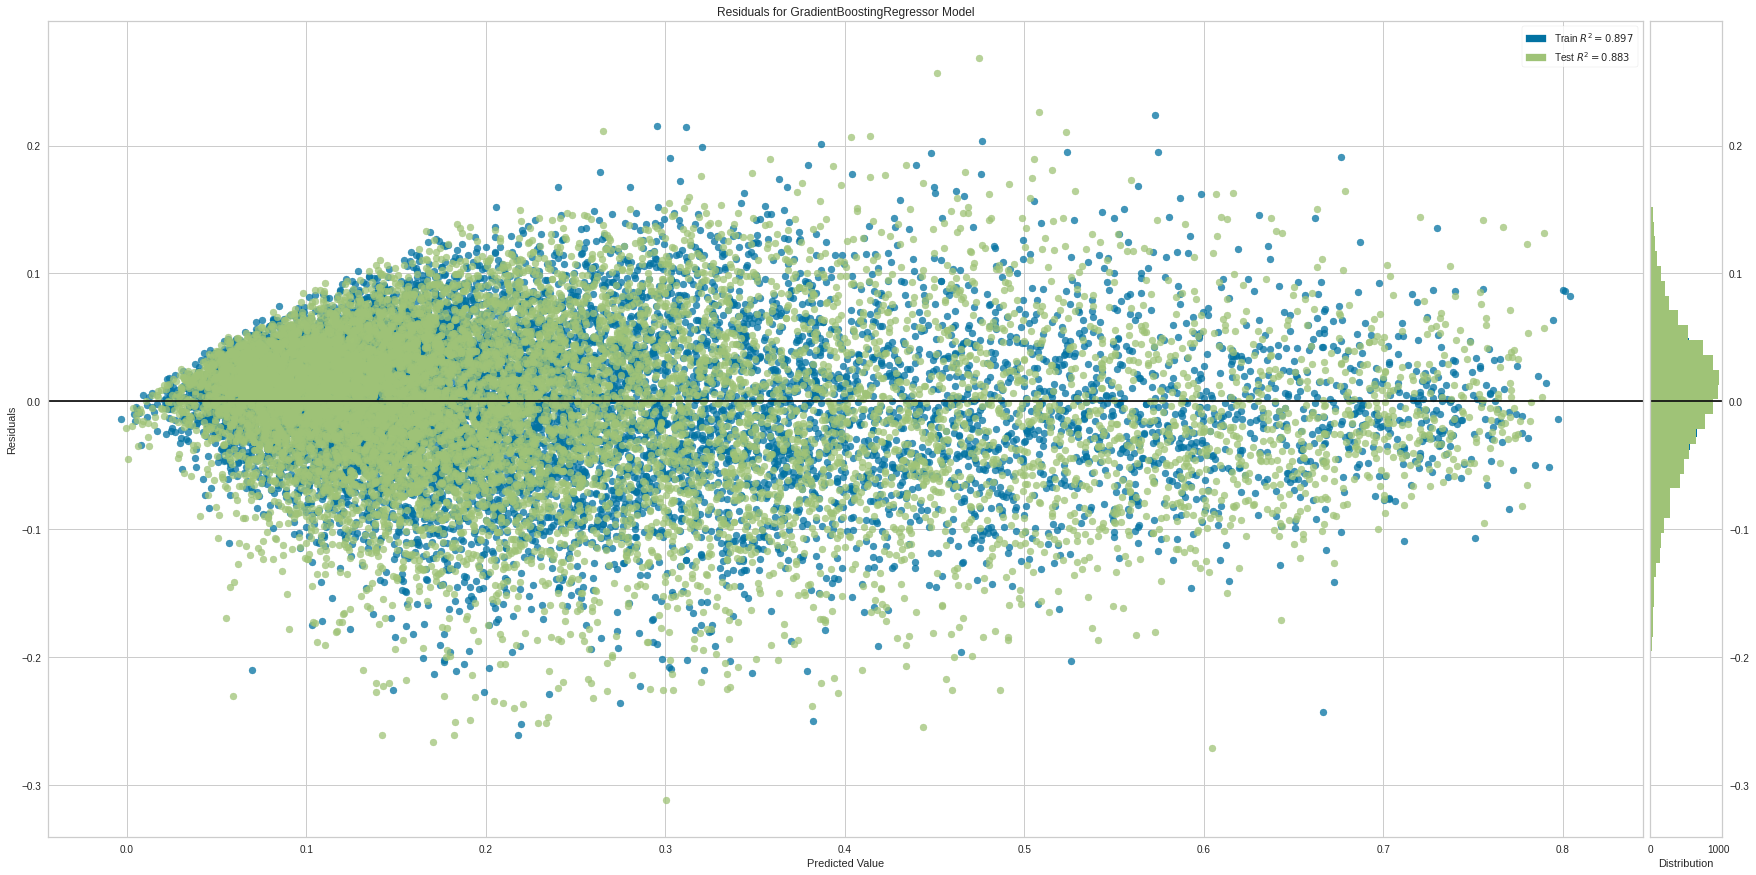

In [16]:
viz = residuals_plot(GradientBoostingRegressor(), X_train, y_train, X_test, y_test)

## LR

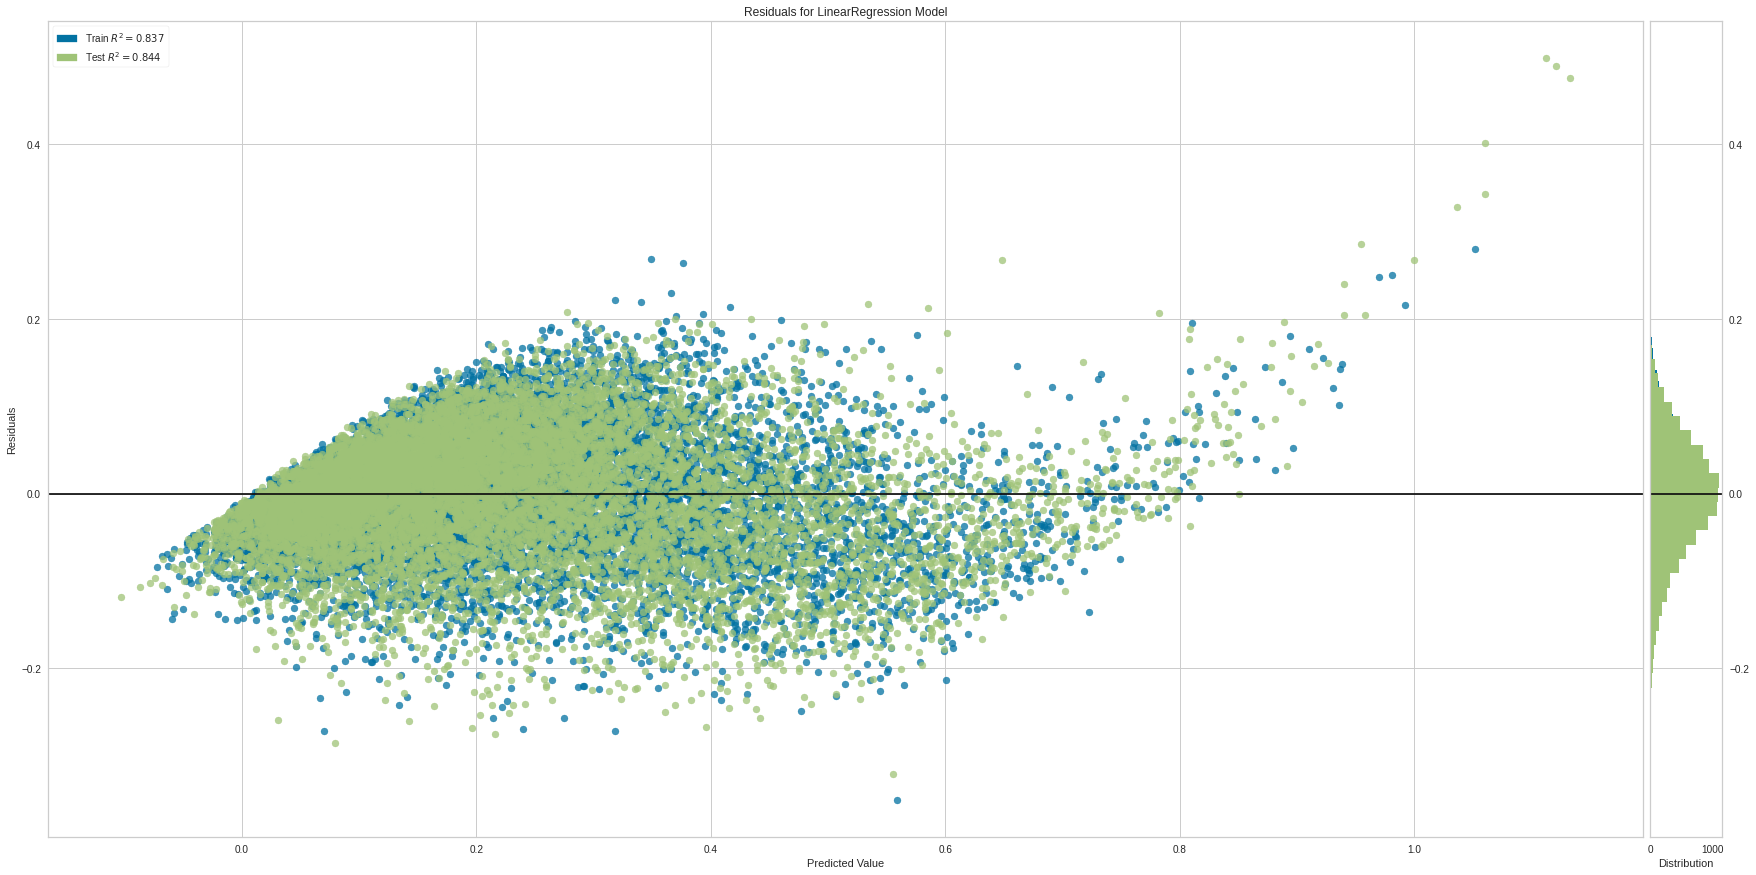

In [15]:
viz = residuals_plot(LinearRegression(), X_train, y_train, X_test, y_test)

## LassoCV

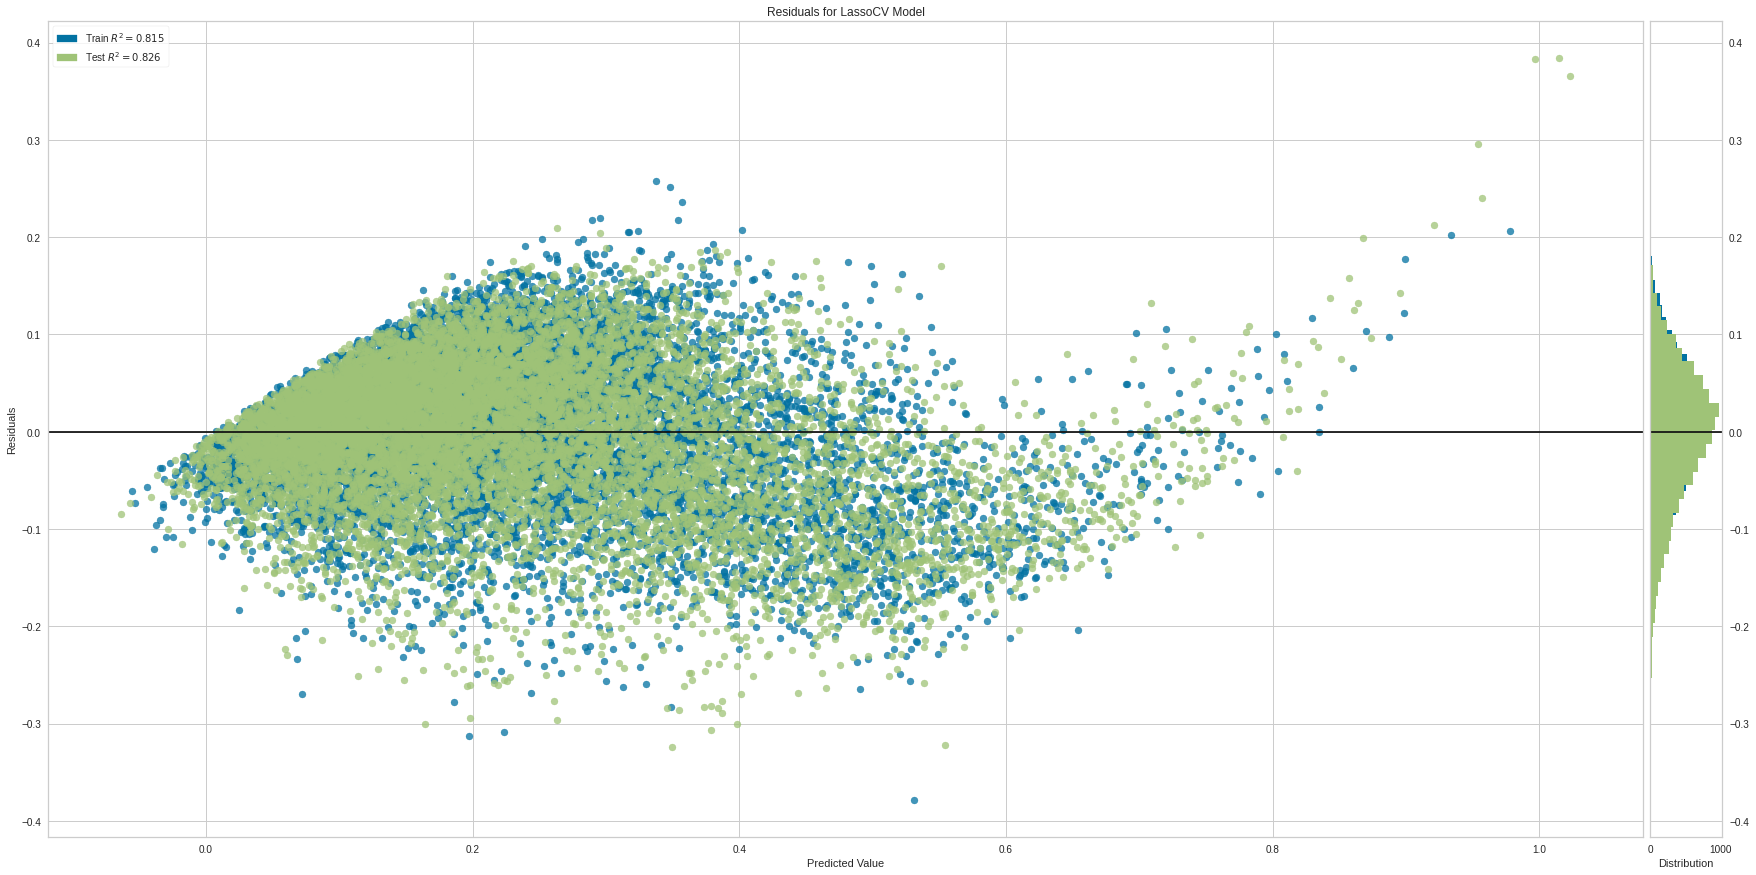

In [18]:
viz = residuals_plot(LassoCV(), X_train, y_train, X_test, y_test)

## LarsCV

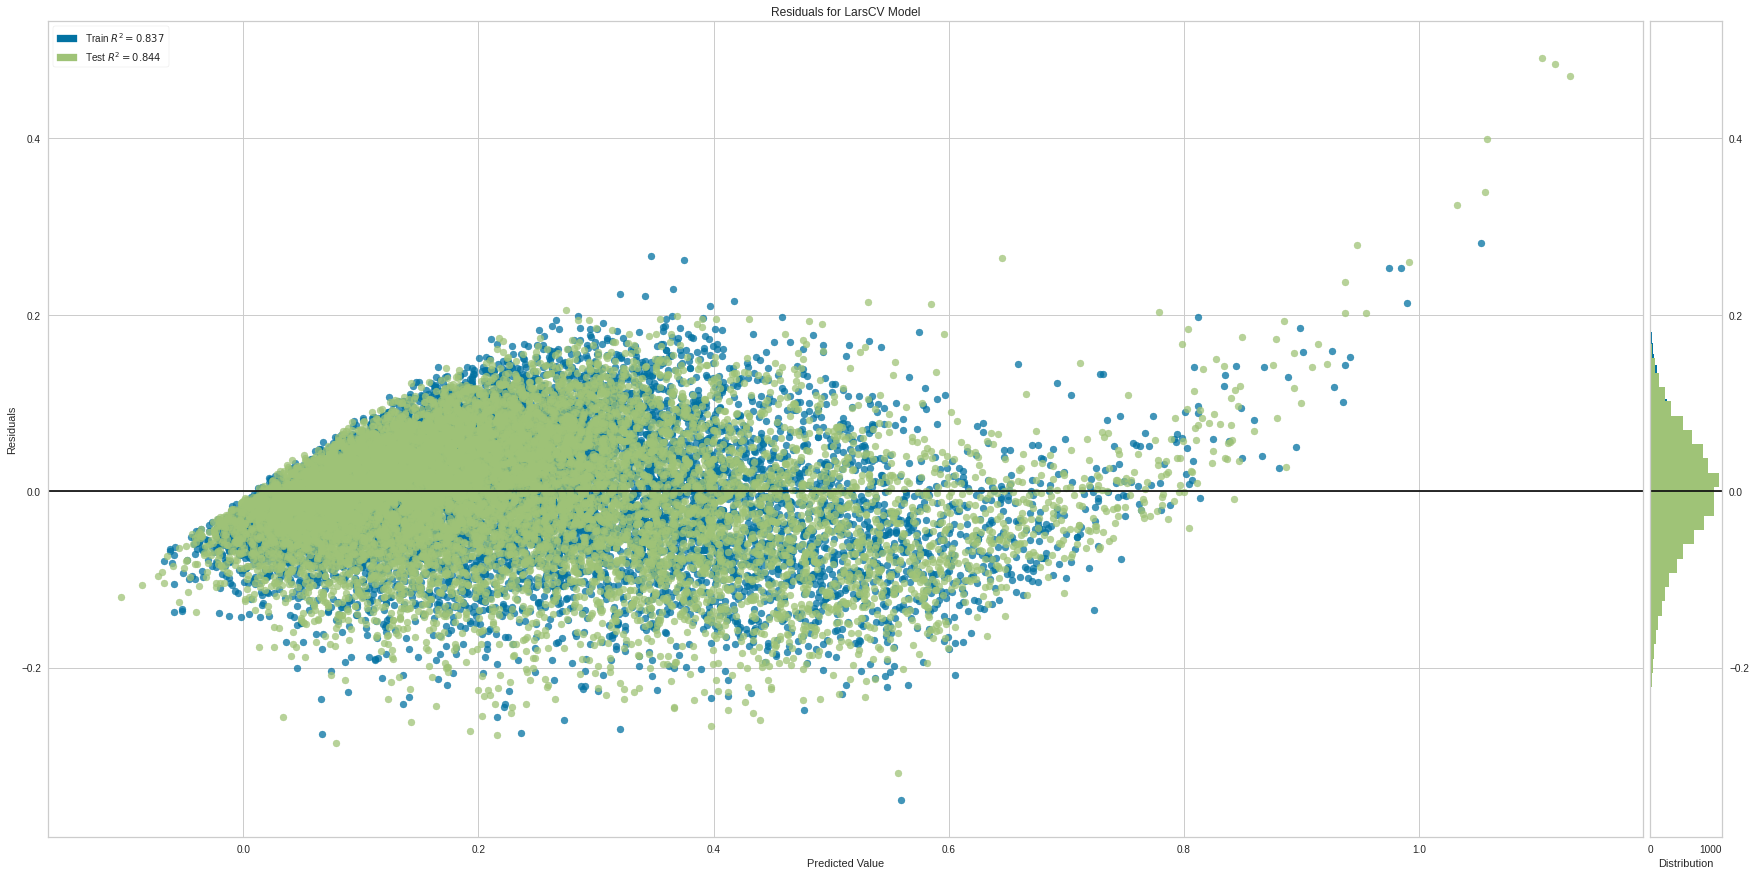

In [19]:
viz = residuals_plot(LarsCV(), X_train, y_train, X_test, y_test)